# Homework 7 (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1) Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)

### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018.csv" and skip the first row.

**Task: read (1 point)**

Save a copy of the data frame just in case.

In [2]:
# answer
sdss_df = pd.read_csv("Skyserver_SQL2_27_2018.csv")
sdss_df_backup = sdss_df

**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [3]:
# head
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [4]:
# information
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [5]:
# answer
sdss_df.drop(columns=['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid'],inplace=True)

Find our how many examples there are, how many attributes or feature, and the type of class.

In [6]:
# description
sdss_df.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


**Task: How many objects are in each class? (1 point)**

In [7]:
# Count the elements in each class
sdss_df.groupby('class').nunique()

,ra,dec,u,g,r,i,z,redshift
class,,,,,,,,
GALAXY,4998,4998,4920,4942,4949,4953,4970,4976
QSO,850,850,849,848,849,849,850,850
STAR,4152,4152,4123,4128,4127,4131,4131,3812


The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [8]:
sdss_df_save = sdss_df # make a copy of the original data before cleaning it. That works well when the data is small.

# encode class labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df['class'])
sdss_df['class'] = y_encoded
#  GALAXY = 0
# STAR = 1
# QSO = 2

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

In [9]:
#solution
pear_corr = sdss_df.drop({'class'},axis=1).corr(method='pearson')
pear_corr

,ra,dec,u,g,r,i,z,redshift
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.030307
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.067021
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000


<Figure size 1500x1200 with 0 Axes>

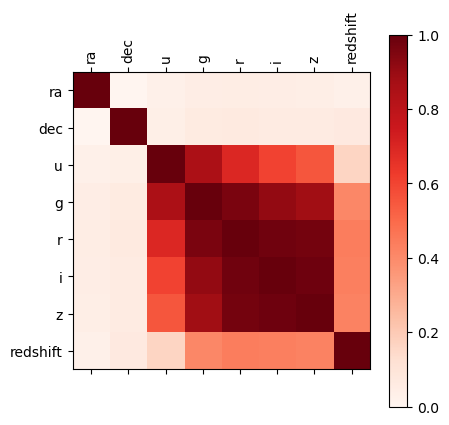

In [10]:
plt.figure(figsize=(15,12))

plt.matshow(pear_corr, cmap="Reds")

plt.colorbar()
plt.clim(0,1)

# labels= {"mean_slope","mean_thickness","area"}
labels = sdss_df.drop({'class'},axis=1).keys().tolist()
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels)

plt.show()

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

<AxesSubplot: >

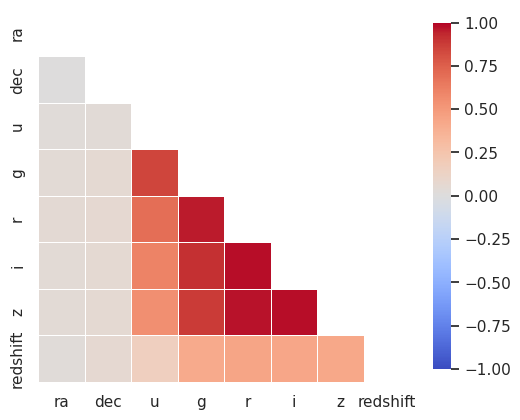

In [11]:
# answer
import seaborn as sns

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pear_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = "coolwarm"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pear_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

<AxesSubplot: >

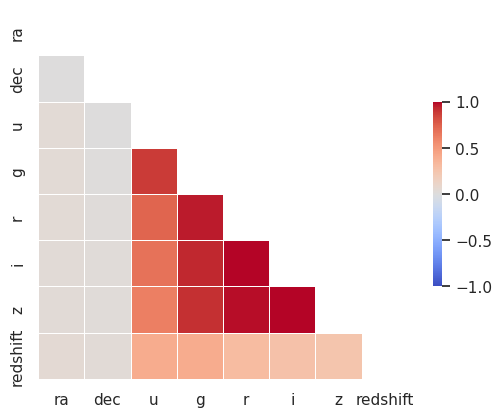

In [12]:
# make the same plot for Galaxies
# "GALAXY" is label 0
pear_corr_0 = sdss_df[sdss_df["class"] == 0].drop({'class'},axis=1).corr(method='pearson')

sns.heatmap(pear_corr_0, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

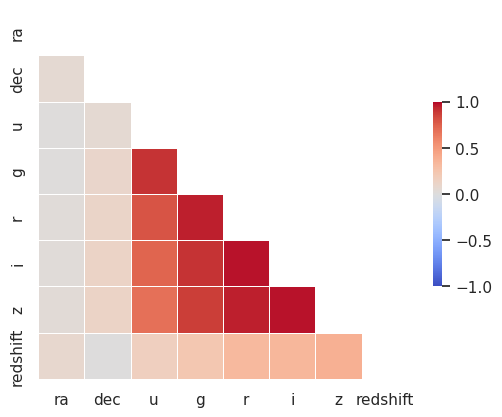

In [13]:
# Make the same plot for Stars (label 1)

pear_corr_1 = sdss_df[sdss_df["class"] == 1].drop({'class'},axis=1).corr(method='pearson')

sns.heatmap(pear_corr_1, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

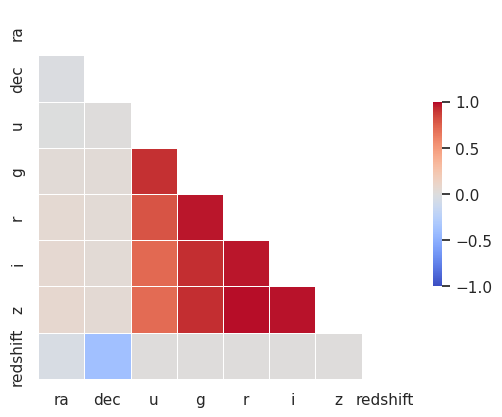

In [14]:
# make the same plots for quasars (label 2)

pear_corr_2 = sdss_df[sdss_df["class"] == 2].drop({'class'},axis=1).corr(method='pearson')

sns.heatmap(pear_corr_2, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

* The five bands of telescope, i.e.g, u, g, r, i, z and highly positive-correlated, except "u" is relatively less correlated to other four bands. I think they can be grouped together. Besides, "plate" and "mjd" are highly correlated too.
* The class "Galaxies" and class "Stars" have similar correlation pattern, while class "Quasars" are seen to be more independent.

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

Text(0.5, 1.0, 'class Quasars')

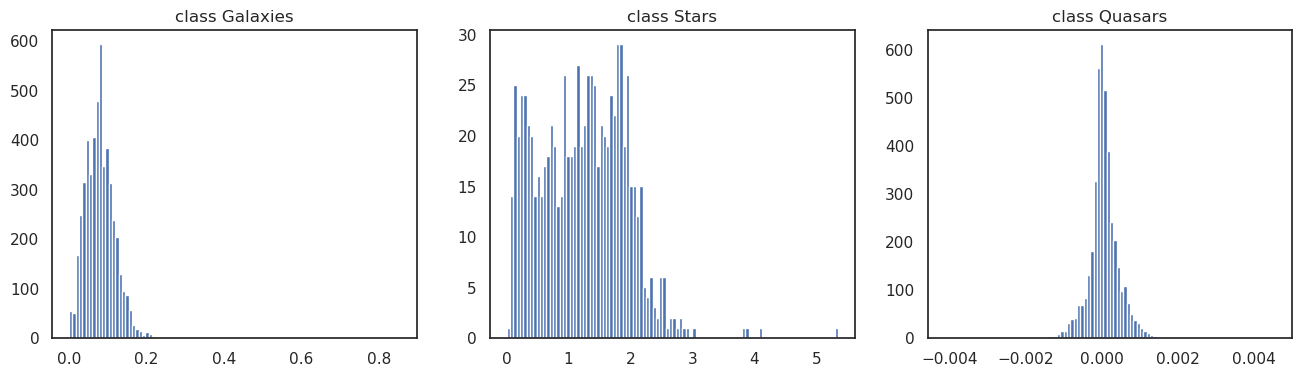

In [15]:
# answer
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))

axes[0].hist(sdss_df[sdss_df["class"] == 0].redshift, 100)
axes[0].set_title("class Galaxies")

axes[1].hist(sdss_df[sdss_df["class"] == 1].redshift, 100)
axes[1].set_title("class Stars")

axes[2].hist(sdss_df[sdss_df["class"] == 2].redshift, 100)
axes[2].set_title("class Quasars")

**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Galaxy:** The redshift values may come from a slightly right-shifted normal distribution with positive skewness. It looks like galaxies are moving away from the Earth but at slow speeds.

* **Stars:** The redshift values for stars are a lot more uniformly distributed than other two classes. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers. This probably means that stars are moving away from the earth with a diverse range of speeds.

* **Quasars:** The histogram seems to be a zero-centered normal distribution. They are both coming toward and away from the Earth.

#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

Text(0.5, 1.0, 'Equatorial coordinates')

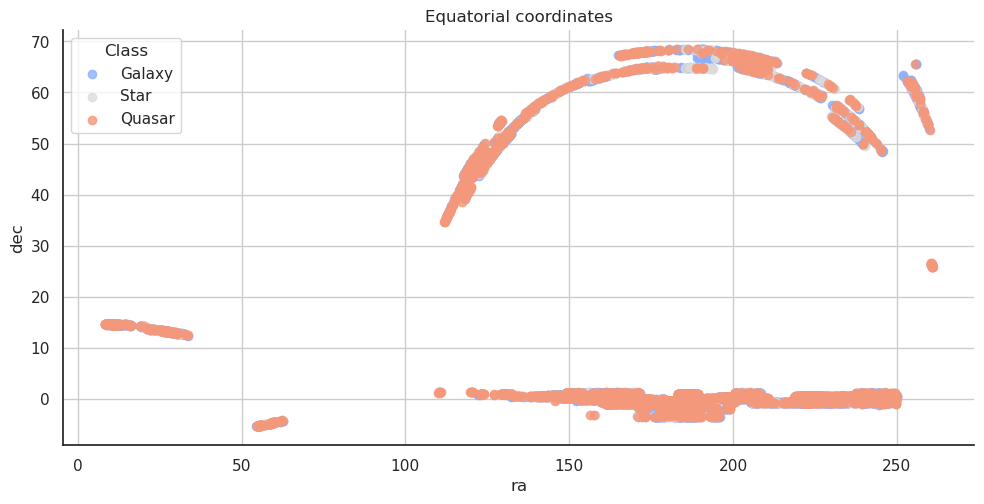

In [16]:
# sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2,legend=False)
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm', aspect=2,legend=False)
plt.legend(title='Class', loc='upper left', labels=['Galaxy', 'Star','Quasar'])
plt.grid(True)
plt.title('Equatorial coordinates')

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

the right ascension (ra) can only be positive value while declination (dec) can be any values from negative to positive, including zero.

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

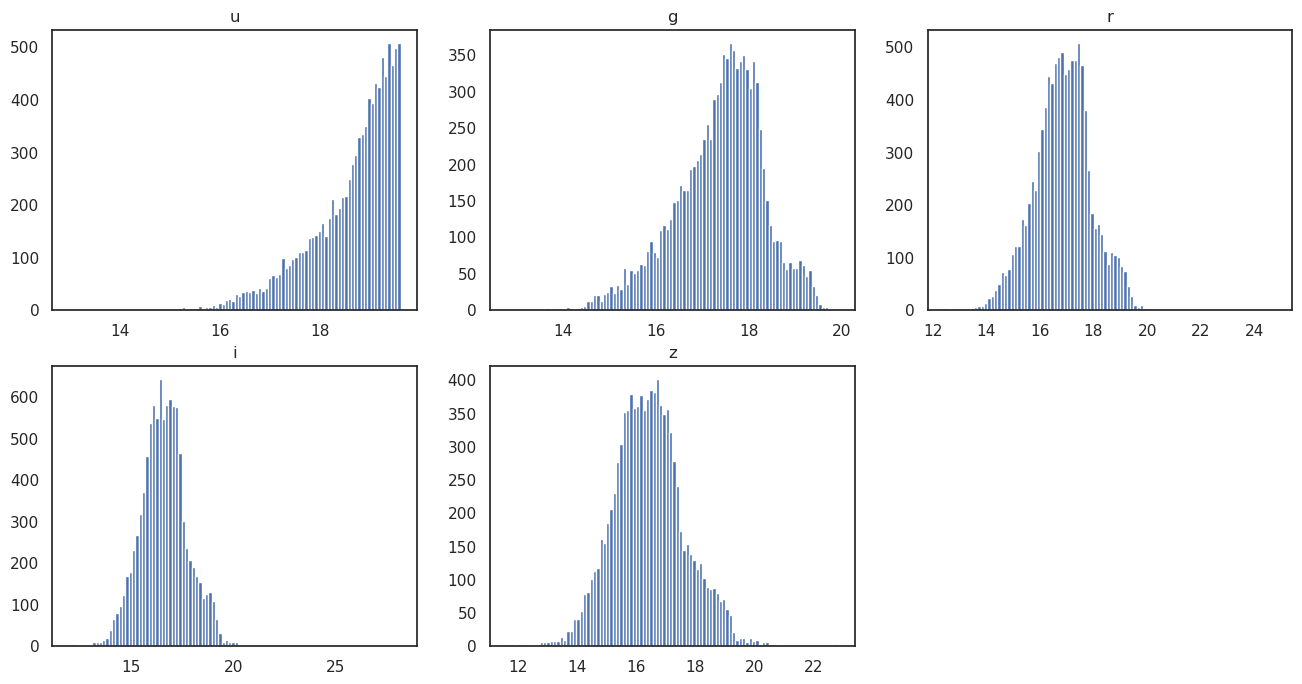

In [17]:
# Plot of histograms
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16, 8))
axes = axes.flatten()

axes[0].hist(sdss_df["u"], 100)
axes[0].set_title("u")

axes[1].hist(sdss_df.g, 100)
axes[1].set_title("g")

axes[2].hist(sdss_df.r, 100)
axes[2].set_title("r")

axes[3].hist(sdss_df.i, 100)
axes[3].set_title("i")

axes[4].hist(sdss_df.z, 100)
axes[4].set_title("z")

fig.delaxes(axes[5])

**Discussion:** They are all gaussian (normal) distribution except "u" with highly-negative skewed distribution.

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the sklearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

In [18]:
# anwer
from sklearn.decomposition import PCA

pca=PCA(n_components=5).fit(sdss_df[{"u","g","r","i","z"}].transpose())# retain all 5 filters
print(pca)

PCA(n_components=5)


In [19]:
# The 5 PCs' explained variance
print(pca.explained_variance_)

[9.53174786e+03 8.79545339e+01 5.60868589e+01 1.66982331e+01
 3.43388046e-26]


In [20]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95) +1
print("minimum dimension size to explain 95% of the variance ",d)

minimum dimension size to explain 95% of the variance  1


*Answer on how many PCs to use*

**The 1st PC explains mainly of the variance, followed by othe PCs with 2 orders off in terms of variance. Therefor, I choose 1 PC to use, with 95% variance explanation.**

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [21]:
# answer
pca = PCA(n_components=d).fit(sdss_df[{"u","g","r","i","z"}])
filter_pca = pca.transform(sdss_df[{"u","g","r","i","z"}])
filter_new = pca.inverse_transform(filter_pca)

In [22]:
print(filter_pca.shape)
print(filter_new.shape)

(10000, 1)
(10000, 5)


In [23]:
# replace the new values, but only 1 PCs
sdss_df.u = filter_new[:,0]
sdss_df.g = filter_new[:,1]
sdss_df.r = filter_new[:,2]
sdss_df.i = filter_new[:,3]
sdss_df.z = filter_new[:,4]

## 2) Machine Learning Models (26 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (2 points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 2.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (2 points)**

In [24]:
# answer
from sklearn import preprocessing

# normalize
scaler = preprocessing.StandardScaler().fit(sdss_df.drop("class",axis=1))
features = scaler.transform(sdss_df.drop("class",axis=1))
# create labels, i.e., what we want to predict
labels = sdss_df['class']
# save the name of the features
features_list = sdss_df.drop("class",axis=1).columns

### 2.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [25]:
# answer
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [26]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7500, 8)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 8)
Testing Labels Shape: (2500,)


Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
label_name = ['Star','Galaxy','Quasar']

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 2.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [28]:
#answer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print("Classifying using K-nearest Neighbors")

t1=time.perf_counter()

# model design
knn = KNeighborsClassifier() # model design

# training
knn.fit(train_features, train_labels) # learn

# evaluation on test
knn_prediction = knn.predict(test_features) # predict on test

t2=time.perf_counter()

print(t2-t1)

# print the classification report
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=test_labels ,y_pred=knn_prediction))
print(f"Classification report for classifier {knn}:\n"
      f"{metrics.classification_report(test_labels, knn_prediction)}\n")

Classifying using K-nearest Neighbors
0.09897482302039862
K-nearest Neighbors Accuracy: 0.9016
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1246
           1       0.98      0.92      0.95       242
           2       0.86      0.93      0.89      1012

    accuracy                           0.90      2500
   macro avg       0.92      0.91      0.91      2500
weighted avg       0.90      0.90      0.90      2500




In [29]:
# save values of precision, recall, fscore, accuracy.
# initiate variables for 5 models
precision_all = np.zeros(5)
recall_all = np.zeros(5)
fscore_all = np.zeros(5)
accuracy_all = np.zeros(5)


# from sklearn.metrics import precision_score
# from sklearn.metrics import f1_score
precision_all[0] = metrics.precision_score(test_labels, knn_prediction, average='weighted') # weighted-averaged for all class
recall_all[0] = metrics.recall_score(test_labels, knn_prediction, average='weighted') 
fscore_all[0] = metrics.f1_score(test_labels, knn_prediction, average='weighted') 
accuracy_all[0] = metrics.accuracy_score(y_true=test_labels ,y_pred=knn_prediction)


### 2.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [30]:
# answer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
print("Classifying using Gaussian Naive Bayes")

# re-scale the data
from sklearn.preprocessing import MinMaxScaler
scaler_gnb = MinMaxScaler()
sdss = scaler_gnb.fit_transform(sdss_df.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, sdss_df['class'], test_size=0.33)

t1=time.perf_counter()

# model design
gnb = GaussianNB()

# training
gnb.fit(X_train_gnb, y_train_gnb)

# evaluation
gnb_prediction = gnb.predict(X_test_gnb)

t2=time.perf_counter()

print(t2-t1)

# evaluation: 
# print the classification report
print("Gaussian Naive Bayes Accuracy:", metrics.accuracy_score(y_test_gnb, gnb_prediction))
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(y_test_gnb, gnb_prediction)}\n")

# save values of precision, recall, fscore, accuracy.
precision_all[1] = metrics.precision_score(y_test_gnb, gnb_prediction, average='weighted') # weighted-averaged for all class
recall_all[1] = metrics.recall_score(y_test_gnb, gnb_prediction, average='weighted') 
fscore_all[1] = metrics.f1_score(y_test_gnb, gnb_prediction, average='weighted') 
accuracy_all[1] = metrics.accuracy_score(y_test_gnb, gnb_prediction)

Classifying using Gaussian Naive Bayes
0.0033231661655008793
Gaussian Naive Bayes Accuracy: 0.9703030303030303
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1690
           1       0.78      0.94      0.85       278
           2       1.00      0.97      0.98      1332

    accuracy                           0.97      3300
   macro avg       0.92      0.96      0.94      3300
weighted avg       0.97      0.97      0.97      3300




### 2.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [31]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

t1=time.perf_counter()

# model design
rf = RandomForestClassifier(random_state=42, verbose=True)

# training
rf.fit(train_features, train_labels)# learn

# evaluation
rf_prediction = rf.predict(test_features)

t2=time.perf_counter()

print(t2-t1)

# evaluation: 
# print the classification report
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=test_labels ,y_pred=rf_prediction))
print(f"Classification report for classifier {rf}:\n"
      f"{metrics.classification_report(test_labels, rf_prediction)}\n")

# save values of precision, recall, fscore, accuracy.
precision_all[2] = metrics.precision_score(test_labels, rf_prediction, average='weighted') # weighted-averaged for all class
recall_all[2] = metrics.recall_score(test_labels, rf_prediction, average='weighted') 
fscore_all[2] = metrics.f1_score(test_labels, rf_prediction, average='weighted') 
accuracy_all[2] = metrics.accuracy_score(test_labels, rf_prediction)

Classifying using Random Forest Classifiers


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.3425614247098565
Random Forest Accuracy: 0.9888
Classification report for classifier RandomForestClassifier(random_state=42, verbose=True):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1246
           1       0.98      0.93      0.95       242
           2       0.99      1.00      1.00      1012

    accuracy                           0.99      2500
   macro avg       0.99      0.97      0.98      2500
weighted avg       0.99      0.99      0.99      2500




[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### 2.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [32]:
# answer
from sklearn.svm import SVC
print("Classifying using Support Vector Machine Classfiers")

t1=time.perf_counter()

# model design
svc = SVC(gamma=0.001)

# training
svc.fit(train_features, train_labels)# learn

# evaluation
svc_prediction = svc.predict(test_features)

t2=time.perf_counter()

print(t2-t1)

# evaluation: 
# print the classification report
print("Support Vector Machine Classfiers Accuracy:", metrics.accuracy_score(y_true=test_labels ,y_pred=svc_prediction))
print(f"Classification report for classifier {svc}:\n"
      f"{metrics.classification_report(test_labels, svc_prediction)}\n")

# save values of precision, recall, fscore, accuracy.
precision_all[3] = metrics.precision_score(test_labels, svc_prediction, average='weighted') # weighted-averaged for all class
recall_all[3] = metrics.recall_score(test_labels, svc_prediction, average='weighted') 
fscore_all[3] = metrics.f1_score(test_labels, svc_prediction, average='weighted') 
accuracy_all[3] = metrics.accuracy_score(test_labels, svc_prediction)

Classifying using Support Vector Machine Classfiers
5.877282551955432
Support Vector Machine Classfiers Accuracy: 0.5936
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1246
           1       0.99      0.78      0.88       242
           2       0.93      0.05      0.10      1012

    accuracy                           0.59      2500
   macro avg       0.83      0.61      0.56      2500
weighted avg       0.75      0.59      0.48      2500




### 2.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [33]:
# answer
from sklearn.neural_network import MLPClassifier
print("Classifying using Multi Layer Perceptron Classifier")

t1=time.perf_counter()

# model design
mlp = MLPClassifier(random_state=1, max_iter=300)

# training
mlp.fit(train_features, train_labels)# learn

# evaluation
mlp_prediction = mlp.predict(test_features)

t2=time.perf_counter()

print(t2-t1)

# evaluation: 
# print the classification report
print("Multi Layer Perceptron Classifier Accuracy:", metrics.accuracy_score(y_true=test_labels ,y_pred=mlp_prediction))
print(f"Classification report for classifier {mlp}:\n"
      f"{metrics.classification_report(test_labels, mlp_prediction)}\n")

# save values of precision, recall, fscore, accuracy.
precision_all[4] = metrics.precision_score(test_labels, mlp_prediction, average='weighted') # weighted-averaged for all class
recall_all[4] = metrics.recall_score(test_labels, mlp_prediction, average='weighted') 
fscore_all[4] = metrics.f1_score(test_labels, mlp_prediction, average='weighted') 
accuracy_all[4] = metrics.accuracy_score(test_labels, mlp_prediction)

Classifying using Multi Layer Perceptron Classifier
4.764979775995016
Multi Layer Perceptron Classifier Accuracy: 0.9832
Classification report for classifier MLPClassifier(max_iter=300, random_state=1):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1246
           1       0.98      0.94      0.96       242
           2       0.98      1.00      0.99      1012

    accuracy                           0.98      2500
   macro avg       0.98      0.97      0.98      2500
weighted avg       0.98      0.98      0.98      2500




### 2.4 Model performance and comparison 

### 2.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use the sklearn function ``plot_confusion_matrix``. Find help here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. We tested 5 models, make suplots, set the title on each subplots.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


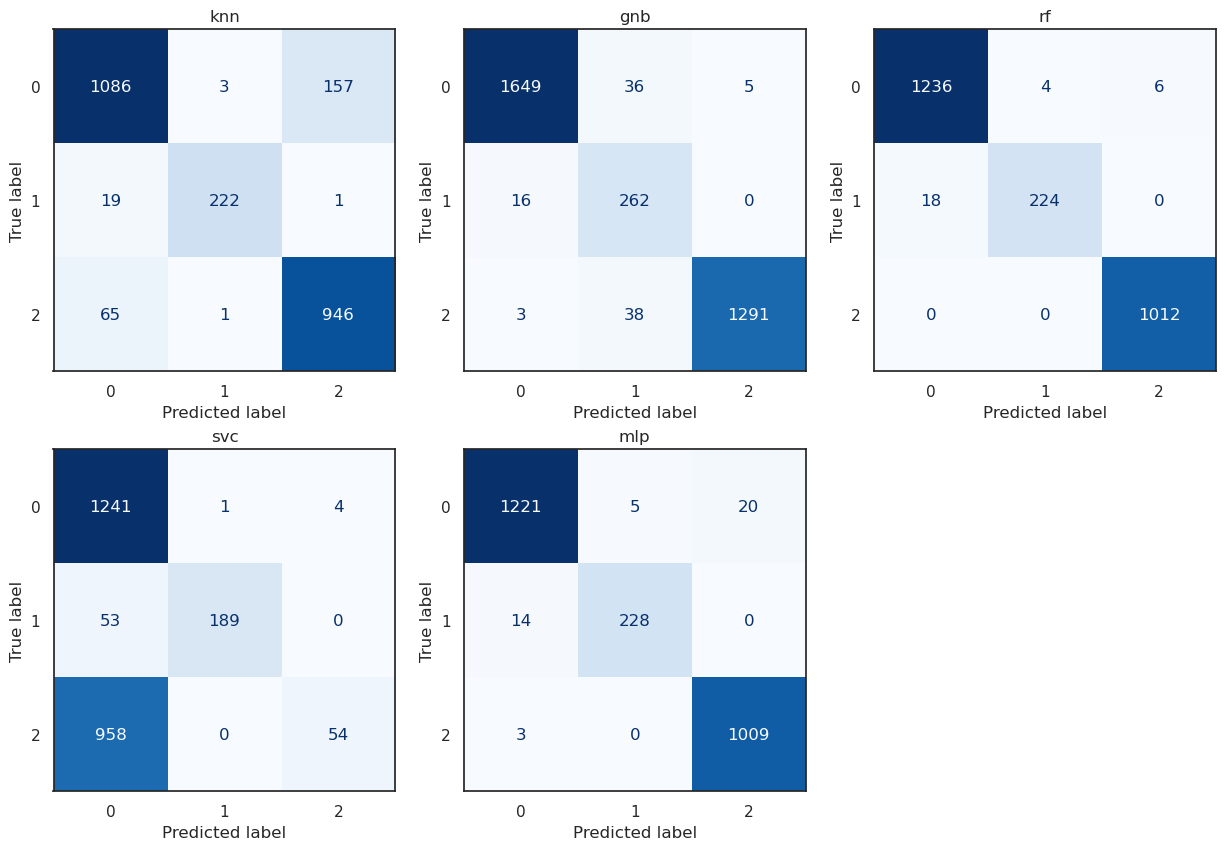

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flatten()

disp = metrics.plot_confusion_matrix(knn, test_features, test_labels, ax=axes[0], cmap='Blues')
disp.ax_.set_title("knn")
disp.im_.colorbar.remove()

disp = metrics.plot_confusion_matrix(gnb, X_test_gnb, y_test_gnb, ax=axes[1], cmap='Blues')
disp.ax_.set_title("gnb")
disp.im_.colorbar.remove()

disp = metrics.plot_confusion_matrix(rf, test_features, test_labels, ax=axes[2], cmap='Blues')
disp.ax_.set_title("rf")
disp.im_.colorbar.remove()

disp = metrics.plot_confusion_matrix(svc, test_features, test_labels, ax=axes[3], cmap='Blues')
disp.ax_.set_title("svc")
disp.im_.colorbar.remove()

disp = metrics.plot_confusion_matrix(mlp, test_features, test_labels, ax=axes[4], cmap='Blues')
disp.ax_.set_title("mlp")
disp.im_.colorbar.remove()

fig.delaxes(axes[5])

**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

In [35]:
print(" KNN, GNB, RF, SVC, MLP")
print(precision_all)
print(recall_all)
print(fscore_all)
print(accuracy_all)

 KNN, GNB, RF, SVC, MLP
[0.90457083 0.97405585 0.98876183 0.74782444 0.98321097]
[0.9016     0.97030303 0.9888     0.5936     0.9832    ]
[0.90184862 0.97143612 0.9886904  0.4791972  0.98313926]
[0.9016     0.97030303 0.9888     0.5936     0.9832    ]


* **times:** in terms of the computational time, GNB is the fastest one, followed by KNN and RF. SVC and MPL are relatively time-consuming.
* **accuracy/fscore:** all are acceptable except SVC. From confusion matrix, the misclassification of "2" as "0" is the main issue. The highest accuracy/fscore belongs to RF, followed by MPL.

**Based on the computational cost and the performance, Random Forest is the best classifier for this case.**

### 2.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each estimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [36]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(knn,train_features,train_labels, cv=10)
print("K-nearest neighbors Mean:", scores_knn.mean(),"Standard Deviation:", scores_knn.std())

scores_gnb = cross_val_score(gnb,X_train_gnb,y_train_gnb, cv=10)
print("Gaussian Naive Bayes Mean:", scores_gnb.mean(),"Standard Deviation:", scores_gnb.std())

scores_rf = cross_val_score(rf,train_features,train_labels, cv=10)
print("Random Forest Mean:", scores_rf.mean(),"Standard Deviation:", scores_rf.std())

scores_svc = cross_val_score(svc,train_features,train_labels, cv=10)
print("Support Vector Machine Mean:", scores_svc.mean(),"Standard Deviation:", scores_svc.std())

scores_mlp = cross_val_score(mlp,train_features,train_labels, cv=10)
print("Multi-Layer Perceotron Mean:", scores_mlp.mean(),"Standard Deviation:", scores_mlp.std())

K-nearest neighbors Mean: 0.9001333333333333 Standard Deviation: 0.008032157590308796
Gaussian Naive Bayes Mean: 0.9707462686567163 Standard Deviation: 0.0056322275415263265


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest Mean: 0.9852000000000001 Standard Deviation: 0.0033439829877291785
Support Vector Machine Mean: 0.5748 Standard Deviation: 0.004969238707622469
Multi-Layer Perceotron Mean: 0.9838666666666664 Standard Deviation: 0.00383898134637011


**Task: Which method won the Xval test (1 point) ?**

Random Forest, again, win the cross-validation test by highest mean accuracy and smallest standard deviation.

### 2.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [37]:
# create data frame
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'SVC','MLP'],
    'Accuracy': accuracy_all,
    'Precision': precision_all,
    'Recall': recall_all,
    'Fscore': fscore_all,
    'Kfold_accuracy_mean': [scores_knn.mean(), scores_gnb.mean(), scores_rf.mean(), scores_svc.mean(), scores_mlp.mean()],
    'Kfold_accuracy_std': [scores_knn.std(), scores_gnb.std(), scores_rf.std(), scores_svc.std(), scores_mlp.std()]})

# sort values by the Fscore with the greatest value first.
results.sort_values(by=['Fscore'], ascending=False)

,Model,Accuracy,Precision,Recall,Fscore,Kfold_accuracy_mean,Kfold_accuracy_std
2,Random Forest,0.988800,0.988762,0.988800,0.988690,0.985200,0.003344
4,MLP,0.983200,0.983211,0.983200,0.983139,0.983867,0.003839
1,Naive Bayes,0.970303,0.974056,0.970303,0.971436,0.970746,0.005632
0,KNN,0.901600,0.904571,0.901600,0.901849,0.900133,0.008032
3,SVC,0.593600,0.747824,0.593600,0.479197,0.574800,0.004969


**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

As mentioned before, **Random Forest** classifier has the best accuracy/Fscore and won the cross-validation test.

## 3 Summary (4 points)

### 3.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

Variable: redshift             Importance: 0.78
Variable: u                    Importance: 0.04
Variable: g                    Importance: 0.04
Variable: r                    Importance: 0.04
Variable: i                    Importance: 0.04
Variable: ra                   Importance: 0.02
Variable: z                    Importance: 0.02
Variable: dec                  Importance: 0.01


Text(0.5, 1.0, 'Feature Importance for Random Forest Classifier')

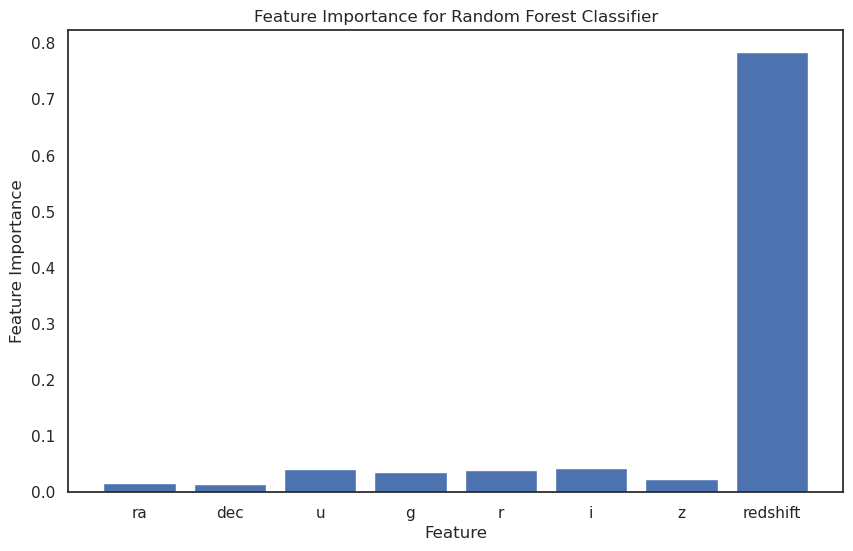

In [50]:
# answer
# vector of importance
# vector of features

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.figure(figsize=(10,6))
plt.bar(features_list, importances)
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')

**Task: What are the top three features (1 point)?**

Redshift (rank #1) and u,g,r,i (rank equally as #2)

<!-- answer -->

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

* Features reduction may help some times or not. For example, after PCA, the new features are still not the best predictor.
* Sometime trade-off is not necessary; Random Forest Classifier here are both computational efficient and with high accuracy.

## Bonus questions (5 points)


Perform hyperparameter tuning and ensemble learning to improve on the classification performance.

In [ ]:
# answer below


<!-- answer -->